In [2]:
import numpy as np
import pandas as pd
import sklearn

In [8]:
from sklearn.datasets import load_boston
df = load_boston()

In [9]:
df  #displays the entire dataset

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [7]:
df.keys()  #Returns all the keys of the dataset dictionary

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [13]:
  print(df.feature_names)  #provides info of the dataset

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [17]:
boston = pd.DataFrame(df.data, columns=df.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
#Adding a new column of target values to the dataframe
boston['TARG'] = df.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv,MEDV,TARG
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,36.2,36.2


In [25]:
#checking if the dataset contains any null value or not
boston.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv,MEDV,TARG
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
boston.isnull().sum()  #True '1' and False '0'

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
medv       0
MEDV       0
TARG       0
dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

# axis = 1 means the drop a column and axis = 0 means the drop a column
X = boston.drop('TARG', axis=1)
Y = boston['TARG']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 1)

# No. of rows and columns present in each dataset
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(430, 15)
(76, 15)
(430,)
(76,)


In [28]:
#importing Linear Regression model from sklearn and train it on the training dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
## Fitting model on the training dataset

lin_model = LinearRegression()

lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
Y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))

print("The model Performance for training dataset")
print('RMSE is {}'.format(rmse))
print("\n")

#on training set
Y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))

print("The model Performance for testing dataset")
print('RMSE is {}'.format(rmse))

The model Performance for training dataset
RMSE is 2.2026899767229423e-14


The model Performance for testing dataset
RMSE is 2.2825221338570055e-14


Text(0, 0.5, 'Predicted')

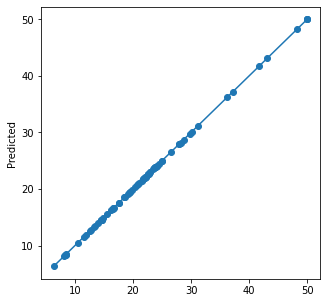

In [32]:
# MATPLOT - a library to plot the curves
# part of data visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(Y_test, Y_test_predict)
plt.plot([min(Y_test_predict),max(Y_test_predict)],[min(Y_test_predict),max(Y_test_predict)])
plt.ylabel('Actual')
plt.ylabel('Predicted')